In [5]:
print(df.columns)


Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [6]:
# Check for missing values in date-related columns
print(df[['Start Year', 'Start Month', 'Start Day']].isnull().sum())


Start Year        0
Start Month      68
Start Day      1497
dtype: int64


In [7]:
# Create Start Date, setting missing day/month values to NaT
df['Start Date'] = pd.to_datetime(
    df[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)


<ipython-input-7-724c7310772f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Date'] = pd.to_datetime(


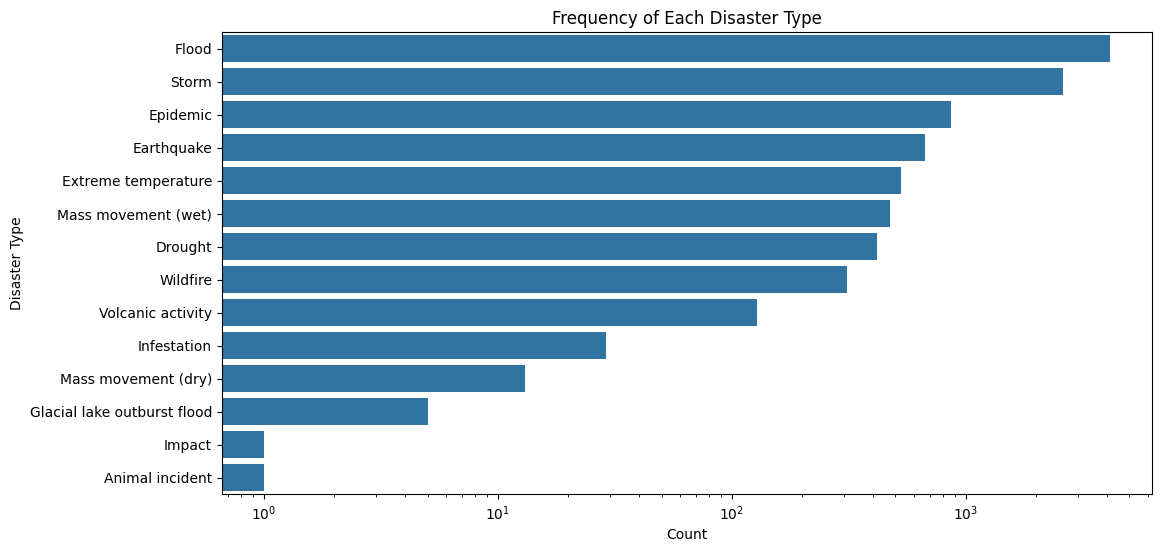

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Disaster Type', data=df, order=df['Disaster Type'].value_counts().index)
plt.title('Frequency of Each Disaster Type')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.xscale('log')  # Use a logarithmic scale
plt.show()


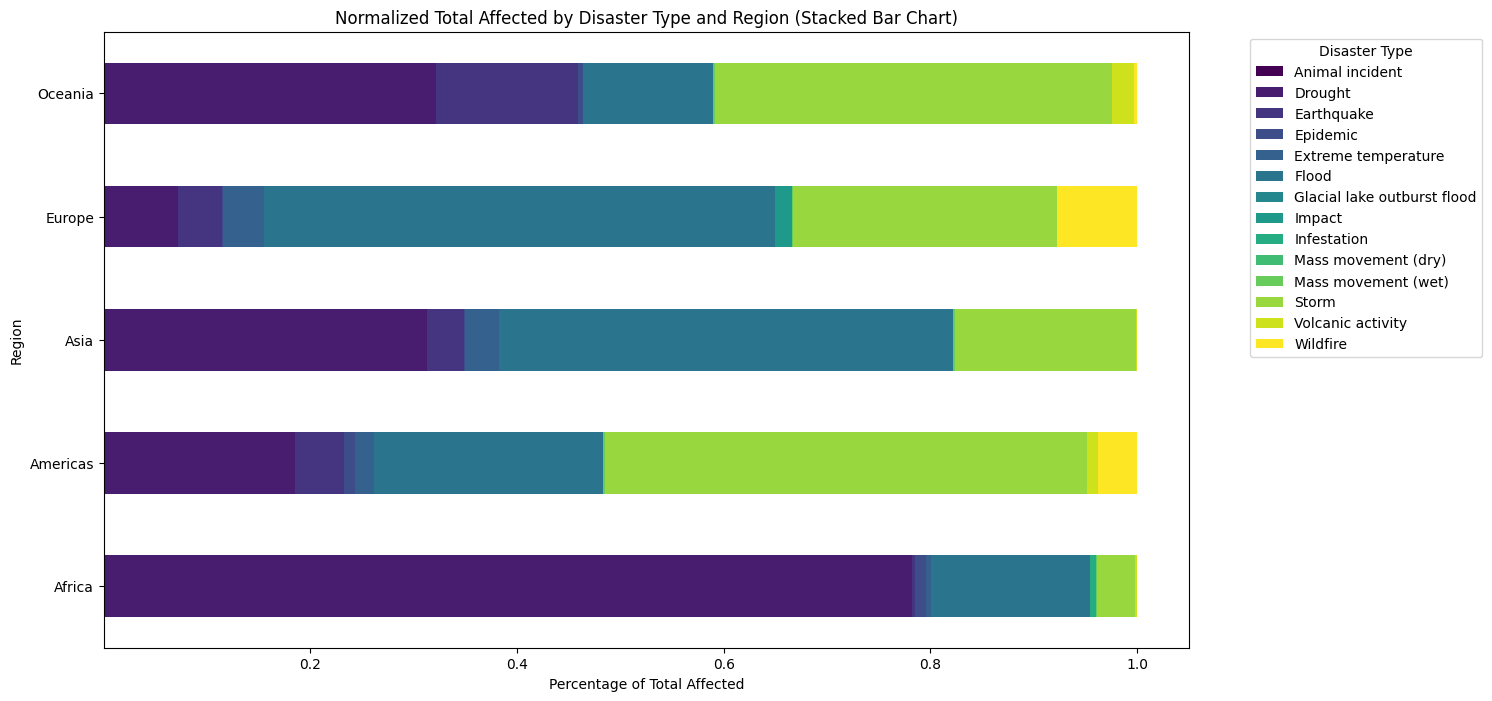

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (if needed)
# Assuming `impact_by_region` is your DataFrame from previous steps
# impact_by_region = pd.DataFrame(...)

# Normalize the impact data by region
normalized_impact = impact_by_region.div(impact_by_region.sum(axis=1), axis=0)

# Create a stacked bar plot
ax = normalized_impact.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')

# Customize the plot
plt.title('Normalized Total Affected by Disaster Type and Region (Stacked Bar Chart)')
plt.xlabel('Percentage of Total Affected')
plt.ylabel('Region')

# Add legend and adjust layout
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


normalized the value of total affected


In [38]:
# Check for NaN values in the metric column
nan_count = df[metric].isna().sum()
print(f'Number of NaN values in {metric}: {nan_count}')


Number of NaN values in Total Deaths: 2910


In [39]:
# Group by Event Name and sum the metric values
grouped_df = df.groupby('Event Name')[metric].sum().reset_index()

# Sort the grouped DataFrame and select the top 10
top_10_disasters = grouped_df.nlargest(10, metric)

# Print the top 10 disasters DataFrame to see the selection
print(top_10_disasters)


                   Event Name  Total Deaths
155          Cyclone 'Nargis'      138375.0
90                    Cholera       44770.0
222                     Ebola       14084.0
467     Meningococcal disease       14024.0
598            Storm 'Daniel'       12352.0
459                   Measles        9475.0
920  Typhoon Haiyan (Yolanda)        7375.0
202                    Dengue        5679.0
163            Cyclone 'Sidr'        4234.0
463                Meningitis        4204.0


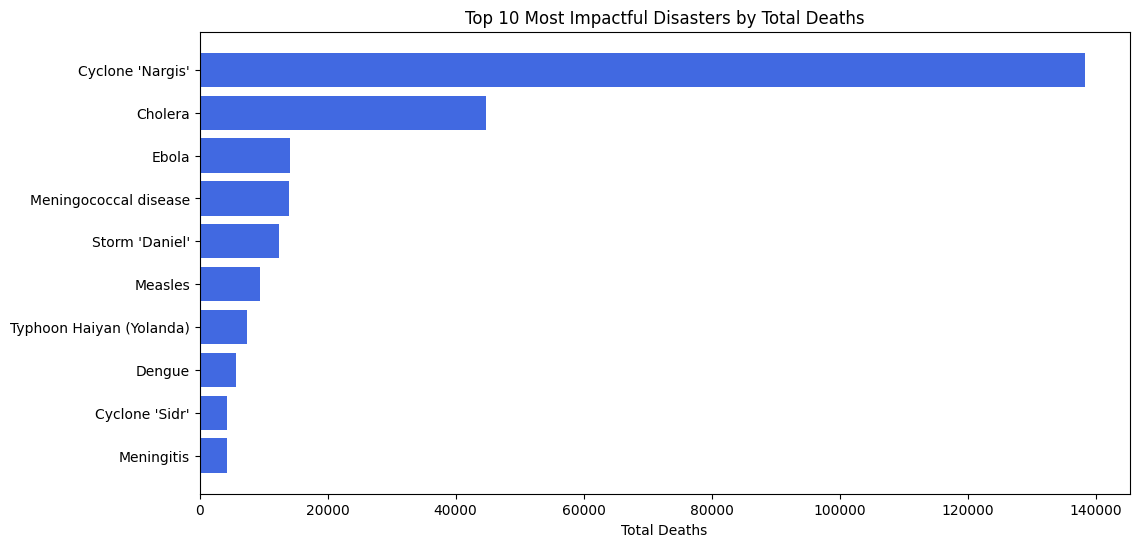

In [40]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_disasters['Event Name'], top_10_disasters[metric], color='royalblue')
plt.xlabel(metric)
plt.title(f'Top 10 Most Impactful Disasters by {metric}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


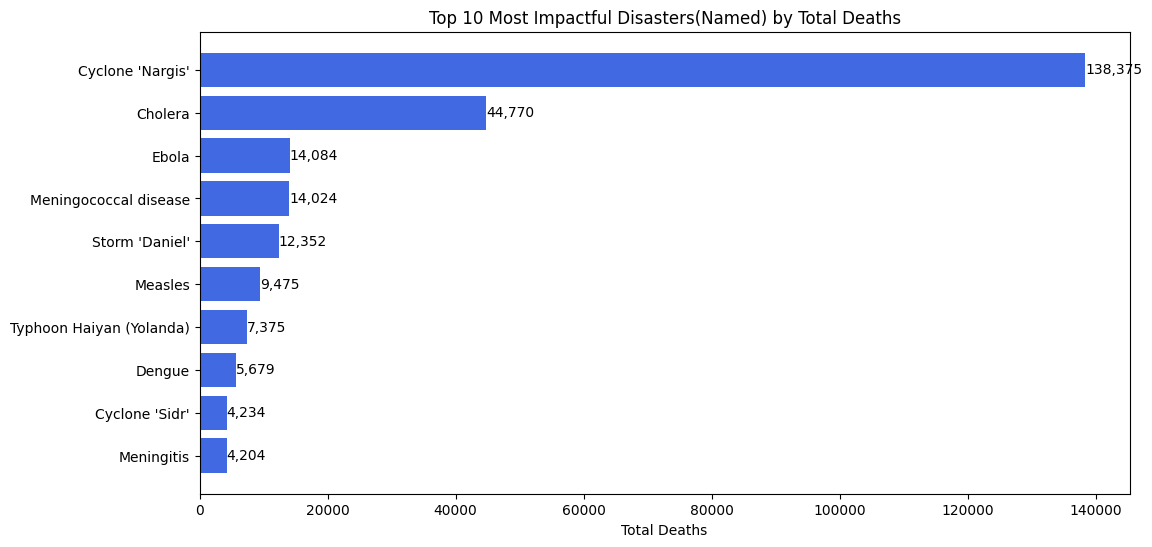

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (if needed)
# df = pd.read_csv('your_dataset.csv')

# Ensure the metric column is numeric
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')  # Change to 'Total Affected' if needed

# Choose the metric: 'Total Deaths' or 'Total Affected'
metric = 'Total Deaths'  # Change this to 'Total Affected' if needed

# Group by Event Name and sum the metric values
grouped_df = df.groupby('Event Name')[metric].sum().reset_index()

# Sort the grouped DataFrame and select the top 10
top_10_disasters = grouped_df.nlargest(10, metric)

# Ensure 'Event Name' is of type string
top_10_disasters['Event Name'] = top_10_disasters['Event Name'].astype(str)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_disasters['Event Name'], top_10_disasters[metric], color='royalblue')

# Annotate the bars with their respective values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)

plt.xlabel(metric)
# Optional: Set logarithmic scale for x-axis


plt.title(f'Top 10 Most Impactful Disasters(Named) by {metric}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


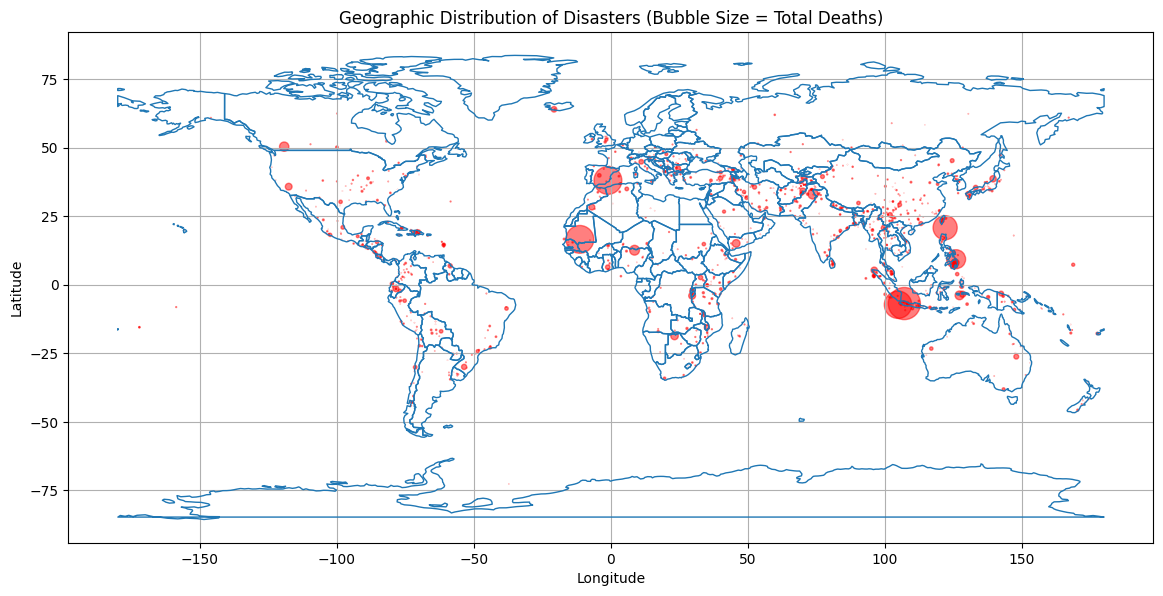

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from a URL
world = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json')

# Create a GeoDataFrame from your disaster data
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"  # WGS 84
)

# Define a scaling factor for visibility
scaling_factor = 0.02  # You can adjust this factor as needed

# Plot the world map
fig, ax = plt.subplots(figsize=(14, 8))
world.boundary.plot(ax=ax, linewidth=1)

# Adjust the markersize for better visibility
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Total Deaths'].fillna(0) * scaling_factor, alpha=0.5)

plt.title('Geographic Distribution of Disasters (Bubble Size = Total Deaths)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


<ipython-input-61-8f132816c902>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = top_3_disasters[i] / top_3_disasters.sum() * 100  # Calculate percentage


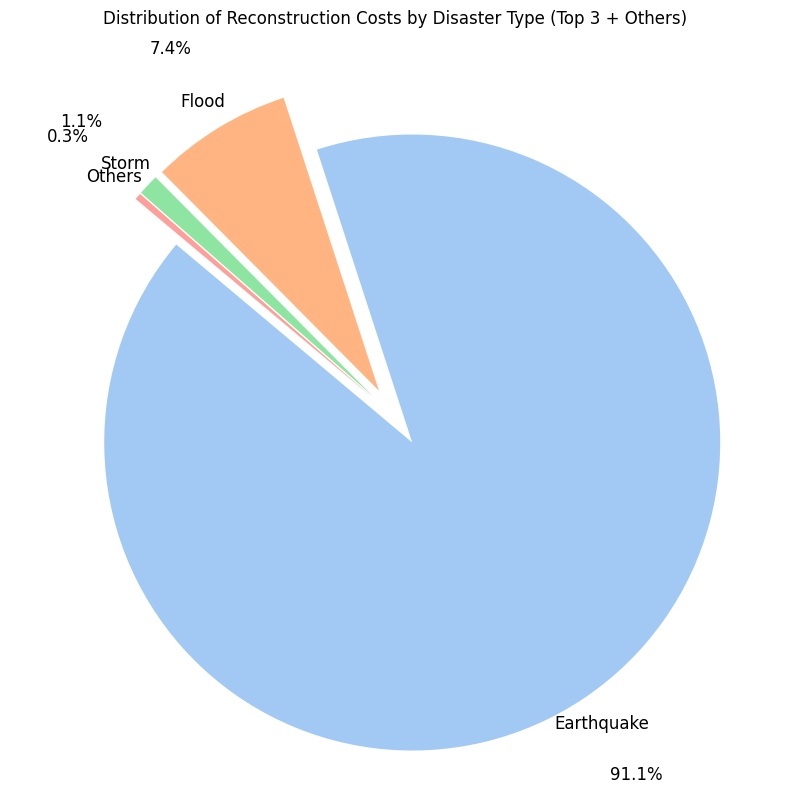

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame already defined and processed

# Group by Disaster Type and sum the Reconstruction Costs
reconstruction_costs = df.groupby('Disaster Type')['Reconstruction Costs (\'000 US$)'].sum()

# Get the top 3 disaster types
top_3_disasters = reconstruction_costs.nlargest(3)

# Sum the rest into an 'Others' category
other_costs = reconstruction_costs[~reconstruction_costs.index.isin(top_3_disasters.index)].sum()

# Create a Series for 'Others'
others_series = pd.Series({'Others': other_costs})

# Concatenate the top 3 with the 'Others'
top_3_disasters = pd.concat([top_3_disasters, others_series])

# Create a pie chart
plt.figure(figsize=(10, 10))

# Explode the slices for better visibility
explode = [0.1] * len(top_3_disasters)  # Adjust explosion of all slices

# Create the pie chart without default percentages inside
wedges, texts = plt.pie(top_3_disasters,
                        explode=explode,
                        labels=None,  # Disable labels inside
                        startangle=140,
                        colors=sns.color_palette('pastel'))

# Add custom percentage labels outside the chart
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Calculate angle for positioning
    y = np.sin(np.radians(angle))  # Calculate y position
    x = np.cos(np.radians(angle))  # Calculate x position
    percentage = top_3_disasters[i] / top_3_disasters.sum() * 100  # Calculate percentage
    plt.text(x * 1.4, y * 1.4, f'{percentage:.1f}%', ha='center', va='center', fontsize=12)

# Add disaster type labels outside the chart
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Calculate angle for positioning
    y = np.sin(np.radians(angle))  # Calculate y position
    x = np.cos(np.radians(angle))  # Calculate x position
    plt.text(x * 1.2, y * 1.2, top_3_disasters.index[i], ha='center', va='center', fontsize=12)

# Add a title
plt.title('Distribution of Reconstruction Costs by Disaster Type (Top 3 + Others)')
plt.show()


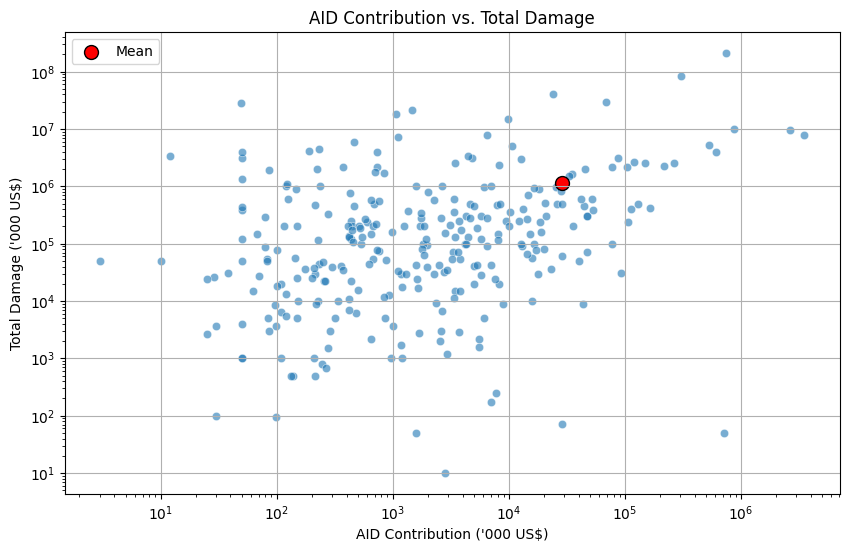

In [65]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AID Contribution (\'000 US$)', y='Total Damage (\'000 US$)', data=df, alpha=0.6)

# Calculate means
mean_aid = df['AID Contribution (\'000 US$)'].mean()
mean_damage = df['Total Damage (\'000 US$)'].mean()

# Plot means
mean_point = plt.scatter(mean_aid, mean_damage, color='red', s=100, label='Mean', edgecolor='black')

# Customize plot
plt.title('AID Contribution vs. Total Damage')
plt.xlabel('AID Contribution (\'000 US$)')
plt.ylabel('Total Damage (\'000 US$)')
plt.grid()
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.legend(loc='upper left')
plt.show()


the aid contribution is 100 times less than the total damage costs.

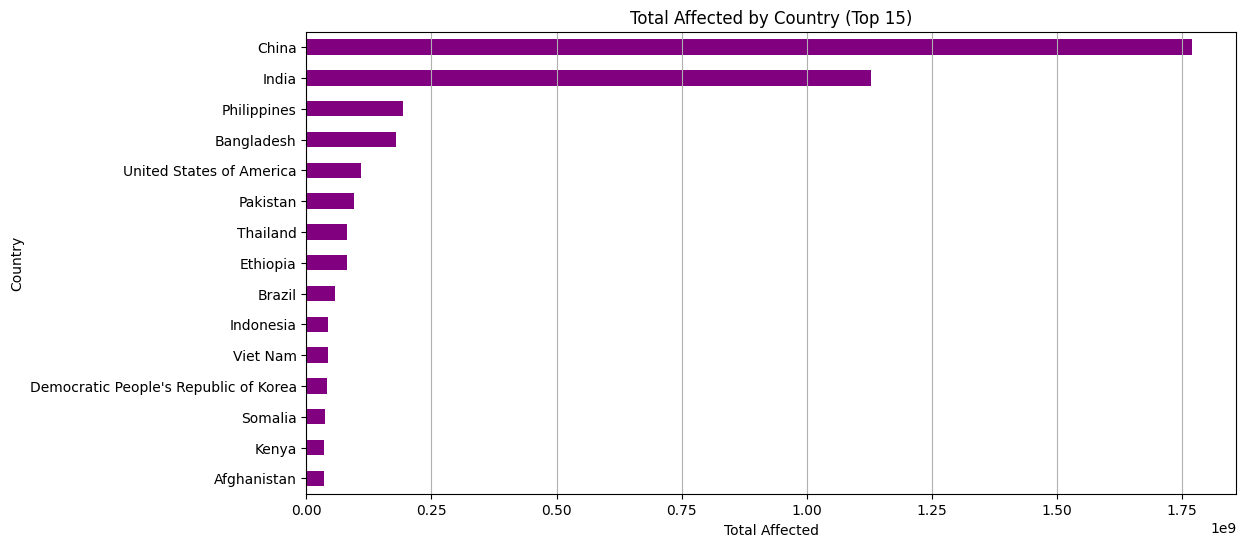

In [71]:
# Policy Focus Areas: Total Affected by Country/Region
affected_by_country = df.groupby('Country')['Total Affected'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
# Plot the data using horizontal bars
affected_by_country.head(15).plot(kind='barh', color='purple')
plt.title('Total Affected by Country (Top 15)')
plt.xlabel('Total Affected')
plt.ylabel('Country')
plt.grid(axis='x')

# Reverse the order of bars to have the highest on top
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()


this can help country to make polices regarding disaster and allocate good amount of money to them

In [93]:
# Cell 10: Summary Statistics
print("Basic Statistics:")
print(f"Total number of disasters: {len(df)}")
print(f"Date range: {df['Start Year'].min()} to {df['Start Year'].max()}")
print("\nTotal affected by disaster type:")
display(df.groupby('Disaster Type')['Total Affected'].sum().sort_values(ascending=False))

# Calculate and display additional statistics
print("\nAverage affected population by disaster type:")
display(df.groupby('Disaster Type')['Total Affected'].mean().sort_values(ascending=False))

print("\nMost common disaster type by region:")
display(df.groupby('Region')['Disaster Type'].agg(lambda x: x.value_counts().index[0]))

Basic Statistics:
Total number of disasters: 10154
Date range: nan to nan

Total affected by disaster type:


,Total Affected
Disaster Type,
Flood,1.824984e+09
Drought,1.685129e+09
Storm,8.391779e+08
Earthquake,1.540052e+08
Extreme temperature,1.338308e+08
Wildfire,1.485520e+07
Epidemic,1.205763e+07
Mass movement (wet),8.779686e+06
Volcanic activity,6.467859e+06



Average affected population by disaster type:


,Total Affected
Disaster Type,
Drought,5.471197e+06
Infestation,1.066667e+06
Extreme temperature,8.417029e+05
Flood,4.980852e+05
Storm,4.368443e+05
Impact,3.014910e+05
Earthquake,2.383982e+05
Wildfire,6.458783e+04
Volcanic activity,5.528085e+04



Most common disaster type by region:


,Disaster Type
Region,
Africa,Flood
Americas,Flood
Asia,Flood
Europe,Flood
Oceania,Storm


In [97]:
# Cell 1: Install required libraries
!pip install folium geopandas

In [98]:
# Cell 2: Import libraries
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
from folium import plugins

In [104]:
# Cell 1: Import additional libraries if needed
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

<Figure size 1500x800 with 0 Axes>

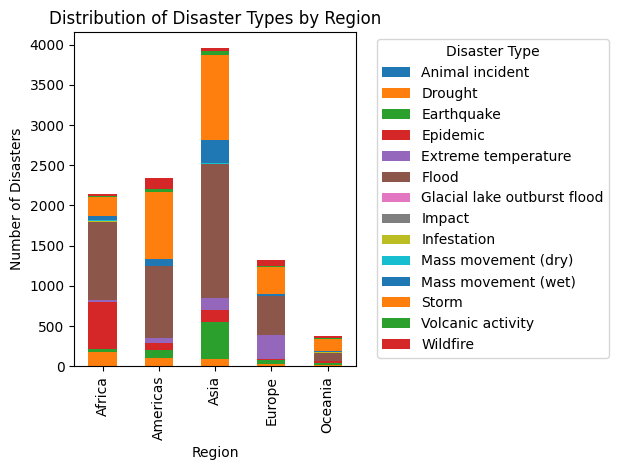

In [105]:
# Cell 2: Disaster Impact by Region and Type (Stacked Bar Chart)
plt.figure(figsize=(15, 8))
disaster_region = pd.crosstab(df['Region'], df['Disaster Type'])
disaster_region.plot(kind='bar', stacked=True)
plt.title('Distribution of Disaster Types by Region')
plt.xlabel('Region')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

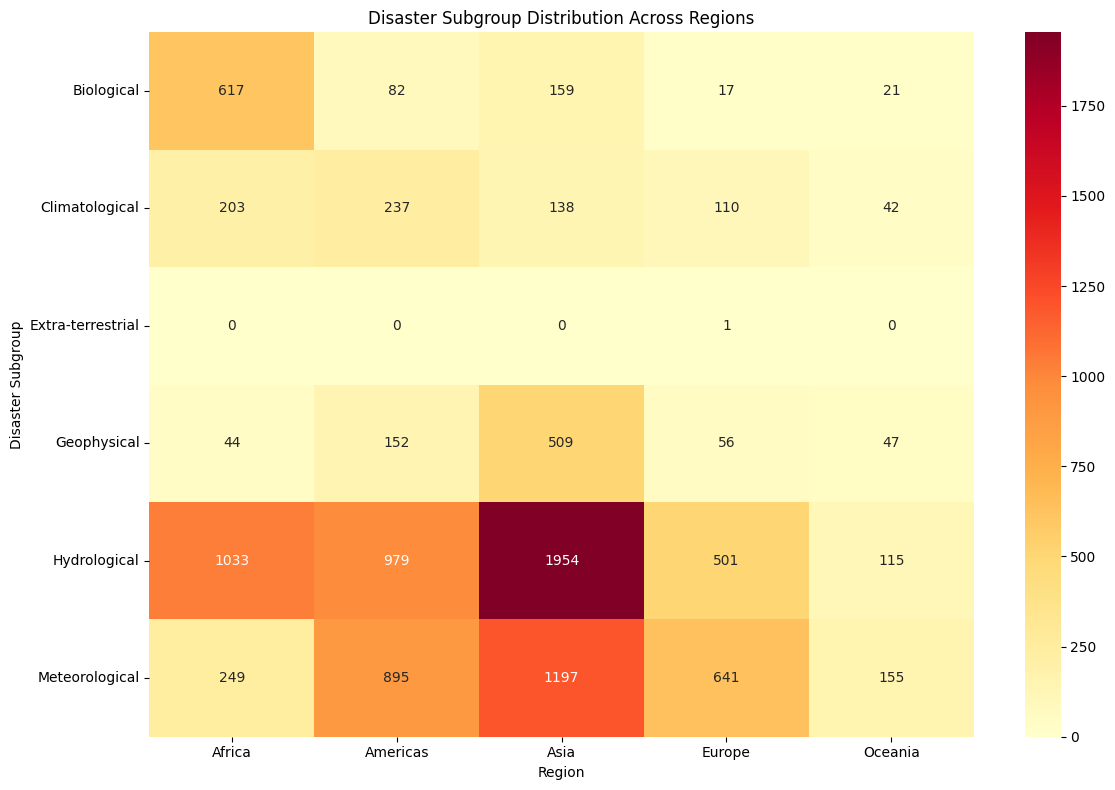

In [107]:
# Cell 4: Subgroup and Region Analysis (Heatmap)
plt.figure(figsize=(12, 8))
subgroup_region = pd.crosstab(df['Disaster Subgroup'], df['Region'])
sns.heatmap(subgroup_region, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Disaster Subgroup Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Disaster Subgroup')
plt.tight_layout()
plt.show()

In [113]:
# Cell 1: First let's identify and clean monetary columns
# Get monetary columns
monetary_cols = [
    'Reconstruction Costs (\'000 US$)',
    'Reconstruction Costs, Adjusted (\'000 US$)',
    'Insured Damage (\'000 US$)',
    'Insured Damage, Adjusted (\'000 US$)',
    'Total Damage (\'000 US$)',
    'Total Damage, Adjusted (\'000 US$)'
]

# Create a clean dataframe with monetary columns
monetary_df = df[monetary_cols].copy()
monetary_df = monetary_df.fillna(0)  # Replace NaN with 0 for visualization

print("Summary of monetary columns:")
display(monetary_df.describe())

Summary of monetary columns:


,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
count,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04
mean,1.823525e+04,2.036782e+04,8.972696e+04,1.159697e+05,3.451333e+05,4.438189e+05
std,1.031582e+06,1.052027e+06,1.242332e+06,1.613636e+06,3.489109e+06,4.635732e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.375000e+03,1.000000e+04
max,1.000000e+08,1.000000e+08,6.000000e+07,9.361435e+07,2.100000e+08,2.844652e+08


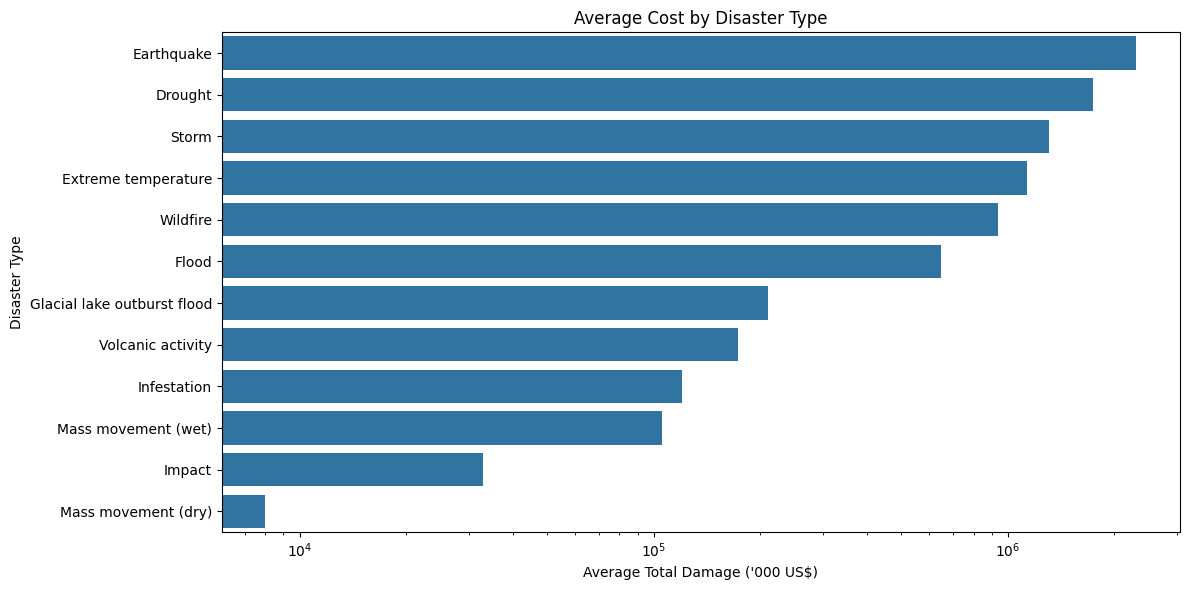


Average cost by disaster type:


,Total Damage ('000 US$)
Disaster Type,
Earthquake,2.307614e+06
Drought,1.740019e+06
Storm,1.309110e+06
Extreme temperature,1.130382e+06
Wildfire,9.390705e+05
Flood,6.461566e+05
Glacial lake outburst flood,2.100000e+05
Volcanic activity,1.732716e+05
Infestation,1.200000e+05


In [132]:
# Cell 4: Average Cost by Disaster Type
plt.figure(figsize=(12, 6))
avg_cost_by_type = df.groupby('Disaster Type')['Total Damage (\'000 US$)'].mean().sort_values(ascending=False)

# Remove the last two entries
avg_cost_by_type = avg_cost_by_type.iloc[:-2]

sns.barplot(x=avg_cost_by_type.values, y=avg_cost_by_type.index)
plt.title('Average Cost by Disaster Type')
plt.xlabel('Average Total Damage (\'000 US$)')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

plt.tight_layout()
plt.show()

# Display the average cost by disaster type without the last two entries
print("\nAverage cost by disaster type:")
display(avg_cost_by_type)


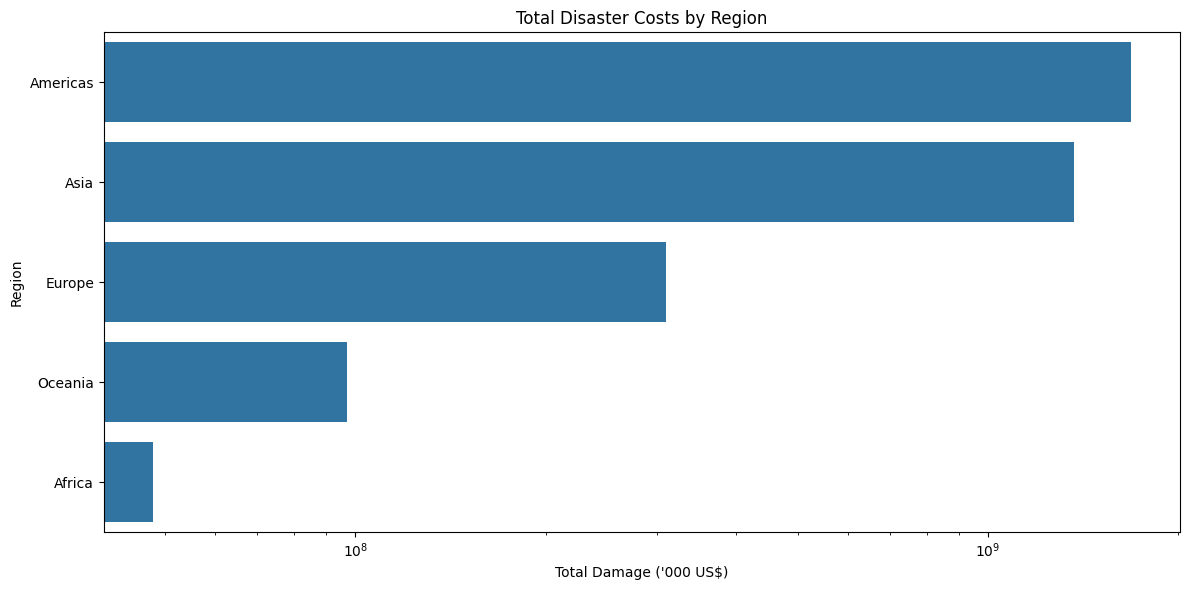


Total costs by region:


,Total Damage ('000 US$)
Region,
Americas,1.683276e+09
Asia,1.366930e+09
Europe,3.093358e+08
Oceania,9.713024e+07
Africa,4.781142e+07


In [133]:
# Cell 5: Regional Cost Analysis
plt.figure(figsize=(12, 6))
regional_costs = df.groupby('Region')['Total Damage (\'000 US$)'].sum().sort_values(ascending=False)

sns.barplot(x=regional_costs.values, y=regional_costs.index)
plt.title('Total Disaster Costs by Region')
plt.xlabel('Total Damage (\'000 US$)')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

plt.tight_layout()
plt.show()

# Display the total costs by region
print("\nTotal costs by region:")
display(regional_costs)


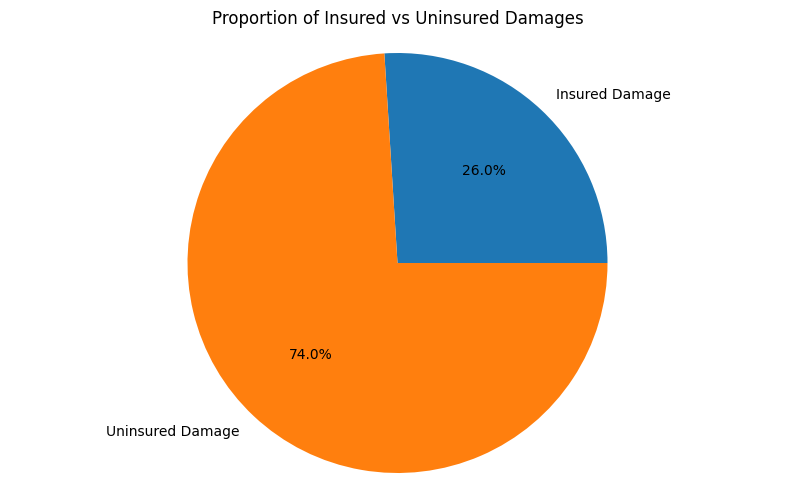


Insured vs Uninsured Damage Summary:
Total Damage: 3,504,483,475.92
Insured Damage: 911,087,530.60
Uninsured Damage: 2,593,395,945.32


In [118]:
# Cell 6: Insured vs Uninsured Damages
plt.figure(figsize=(10, 6))

# Calculate insured and uninsured damages
total_damage = df['Total Damage (\'000 US$)'].sum()
insured_damage = df['Insured Damage (\'000 US$)'].sum()
uninsured_damage = total_damage - insured_damage

# Create pie chart
plt.pie([insured_damage, uninsured_damage],
        labels=['Insured Damage', 'Uninsured Damage'],
        autopct='%1.1f%%')
plt.title('Proportion of Insured vs Uninsured Damages')
plt.axis('equal')
plt.show()

print("\nInsured vs Uninsured Damage Summary:")
print(f"Total Damage: {total_damage:,.2f}")
print(f"Insured Damage: {insured_damage:,.2f}")
print(f"Uninsured Damage: {uninsured_damage:,.2f}")

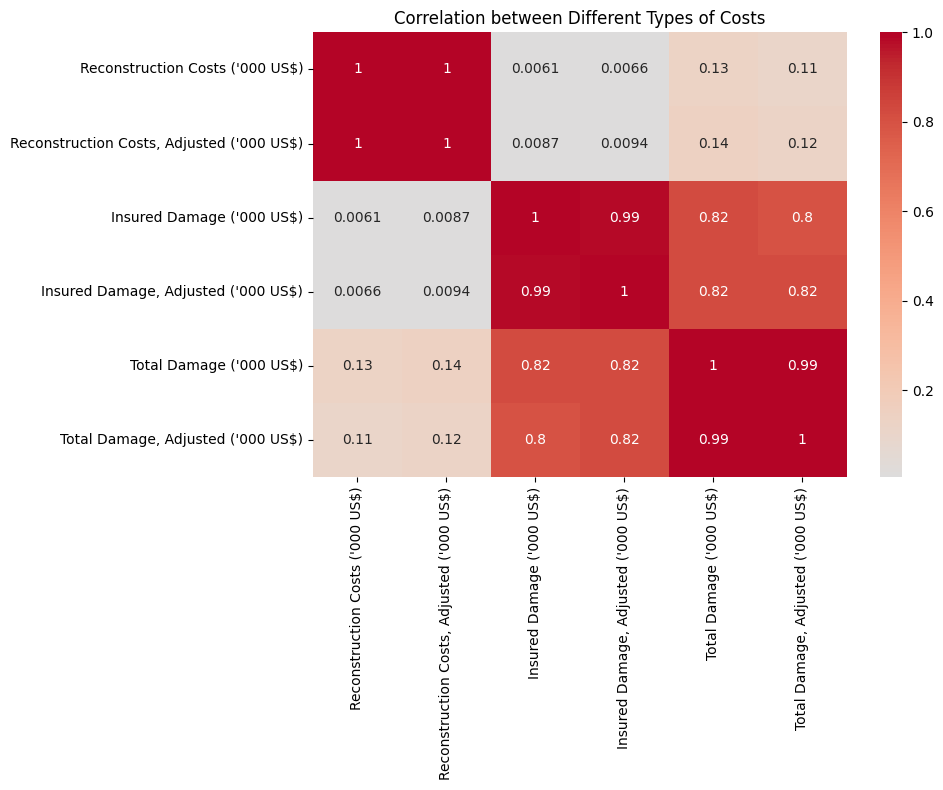

In [119]:
# Cell 7: Cost Correlation Analysis
plt.figure(figsize=(10, 8))
cost_correlation = monetary_df.corr()

sns.heatmap(cost_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Different Types of Costs')
plt.tight_layout()
plt.show()

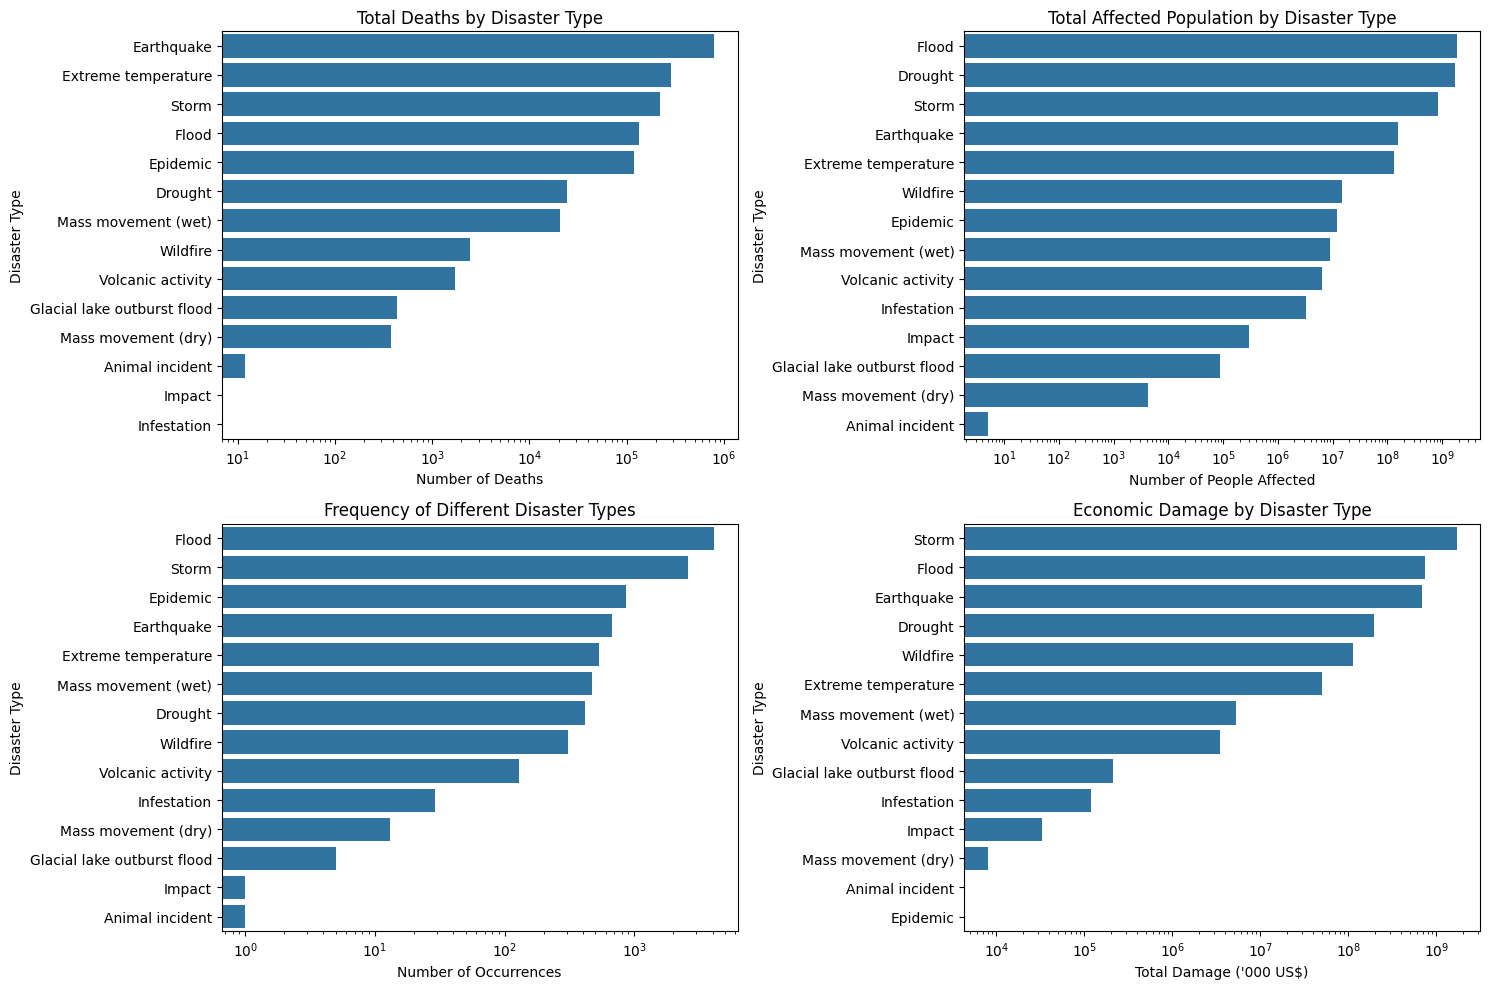


Disaster Type Analysis for Policy Making:

Flood:
Total occurrences: 4110
Average affected per incident: 498,085
Most affected region: Asia

Drought:
Total occurrences: 415
Average affected per incident: 5,471,197
Most affected region: Asia

Storm:
Total occurrences: 2607
Average affected per incident: 436,844
Most affected region: Asia

Earthquake:
Total occurrences: 667
Average affected per incident: 238,398
Most affected region: Asia

Extreme temperature:
Total occurrences: 530
Average affected per incident: 841,703
Most affected region: Asia


In [134]:
# Cell 3: Disaster Type Impact Analysis
plt.figure(figsize=(15, 10))

# Create subplots for different metrics by disaster type
plt.subplot(2, 2, 1)
deaths_by_type = df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
sns.barplot(x=deaths_by_type.values, y=deaths_by_type.index)
plt.title('Total Deaths by Disaster Type')
plt.xlabel('Number of Deaths')
plt.xscale('log')  # Log scale for better visualization

plt.subplot(2, 2, 2)
affected_by_type = df.groupby('Disaster Type')['Total Affected'].sum().sort_values(ascending=False)
sns.barplot(x=affected_by_type.values, y=affected_by_type.index)
plt.title('Total Affected Population by Disaster Type')
plt.xlabel('Number of People Affected')
plt.xscale('log')  # Log scale for better visualization

plt.subplot(2, 2, 3)
freq_by_type = df['Disaster Type'].value_counts()
sns.barplot(x=freq_by_type.values, y=freq_by_type.index)
plt.title('Frequency of Different Disaster Types')
plt.xlabel('Number of Occurrences')
plt.xscale('log')  # Log scale for better visualization

plt.subplot(2, 2, 4)
damage_by_type = df.groupby('Disaster Type')['Total Damage (\'000 US$)'].sum().sort_values(ascending=False)
sns.barplot(x=damage_by_type.values, y=damage_by_type.index)
plt.title('Economic Damage by Disaster Type')
plt.xlabel('Total Damage (\'000 US$)')
plt.xscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

# Print policy-relevant statistics
print("\nDisaster Type Analysis for Policy Making:")
for disaster_type in affected_by_type.head().index:
    disaster_data = df[df['Disaster Type'] == disaster_type]
    print(f"\n{disaster_type}:")
    print(f"Total occurrences: {len(disaster_data)}")
    print(f"Average affected per incident: {disaster_data['Total Affected'].mean():,.0f}")
    print(f"Most affected region: {disaster_data.groupby('Region')['Total Affected'].sum().idxmax()}")
